## PHÁT HIỆN TRI THỨC ẨN TRONG TẬP DỮ LIỆU CHUỖI THỜI GIAN BẰNG PHƯƠNG PHÁP TRỰC QUAN HÓA DỮ LIỆU
---
Mô tả chung:
* Bài này sẽ mô tả việc tìm ra những thông tin ẩn dấu trong một tập dữ liệu có các giá trị thu thập theo chuỗi thời gian. Bằng cách thông qua các biểu đồ được xây dựng từ tập dữ liệu để có được những tri thức ẩn chứa trong tập dữ liệu này.

**Tập dữ liệu:**
* Tập dữ liệu là số lượng xe đạp đi qua cây cầu Fremont Bridge. Dữ liệu này được thu thập tự động thông qua các cảm biến ở 2 lối đi bộ ở phía đông và phía tây của cây cầu. Số lượng xe đạp được tổng hợp theo từng giờ.
* Tập dữ liệu bao gồm 3 trường:
    * Date: Thời gian (ngày - giờ): 10/03/2012 12:00:00 AM (Kiểu thời gian)
    * Fremont Bridge Total: Tổng số xe đi theo cả 2 lối đông và tây (Kiểu số nguyên)
    * Fremont Bridge East Sidewalk: Số xe đạp đi qua lối phía đông của cầu tương ứng với thời gian (Kiểu số nguyên)
    * Fremont Bridge West Sidewalk: Số xe đạp đi qua lối phía tây của cầu tương ứng với thời gian (Kiểu số nguyên)

Thời gian lấy dữ liệu: 2012-10-03 00:00:00 to 2019-11-30 23:00:00
Tổng số dòng dữ liệu: 62760


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1) Tải tập dữ liêu chuỗi thời gian

In [0]:
#Mount tới google drive để tải tập dữ liệu

from google.colab import drive
drive.mount('/content/drive')
path_data ="/content/drive/My Drive/Colab Notebooks/10Project/Data_bicycle/Fremont_Bridge_Bicycle_Counter.csv"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Đọc dữ liệu với Index là cột Date, chuyển sang dữ liệu datetime
data = pd.read_csv(path_data, index_col='Date', parse_dates=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62760 entries, 2012-10-03 00:00:00 to 2019-11-30 23:00:00
Data columns (total 3 columns):
Fremont Bridge Total            62750 non-null float64
Fremont Bridge East Sidewalk    62750 non-null float64
Fremont Bridge West Sidewalk    62750 non-null float64
dtypes: float64(3)
memory usage: 1.9 MB


In [0]:
#Khoảng thời gian lấy dữ liệu
data.index

DatetimeIndex(['2012-10-03 00:00:00', '2012-10-03 01:00:00',
               '2012-10-03 02:00:00', '2012-10-03 03:00:00',
               '2012-10-03 04:00:00', '2012-10-03 05:00:00',
               '2012-10-03 06:00:00', '2012-10-03 07:00:00',
               '2012-10-03 08:00:00', '2012-10-03 09:00:00',
               ...
               '2019-11-30 14:00:00', '2019-11-30 15:00:00',
               '2019-11-30 16:00:00', '2019-11-30 17:00:00',
               '2019-11-30 18:00:00', '2019-11-30 19:00:00',
               '2019-11-30 20:00:00', '2019-11-30 21:00:00',
               '2019-11-30 22:00:00', '2019-11-30 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=62760, freq=None)

In [0]:
# Đổi lại tên các cột cho ngắn gọn
data.columns = ['Total', 'East', 'West']

In [0]:
data.head()

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [0]:
data.tail()

,Total,East,West
Date,,,
2019-11-30 19:00:00,20.0,10.0,10.0
2019-11-30 20:00:00,14.0,8.0,6.0
2019-11-30 21:00:00,13.0,6.0,7.0
2019-11-30 22:00:00,19.0,10.0,9.0
2019-11-30 23:00:00,12.0,6.0,6.0


In [0]:
#Các đặc trưng thống kê của tập dữ liệu
data.describe()

,Total,East,West
count,62750.000000,62750.000000,62750.000000
mean,114.693163,52.726948,61.966215
std,145.818044,67.595710,90.692425
min,0.000000,0.000000,0.000000
25%,15.000000,7.000000,7.000000
50%,62.000000,29.000000,30.000000
75%,150.000000,71.000000,75.000000
max,1097.000000,698.000000,850.000000


In [0]:
#Xác định các vị trí thiếu dữ liệu
#1) Thống kê số lượng dữ liệu thiếu
data.isnull().sum()

Total    10
East     10
West     10
dtype: int64

In [0]:
# 2) Liệt kê các vị trí thiếu dữ liệu
x = pd.isnull(data['East'])
data[x]

,Total,East,West
Date,,,
2013-06-14 09:00:00,NaN,NaN,NaN
2013-06-14 10:00:00,NaN,NaN,NaN
2014-03-09 02:00:00,NaN,NaN,NaN
2015-03-08 02:00:00,NaN,NaN,NaN
2015-04-21 11:00:00,NaN,NaN,NaN
2015-04-21 12:00:00,NaN,NaN,NaN
2016-03-13 02:00:00,NaN,NaN,NaN
2017-03-12 02:00:00,NaN,NaN,NaN
2018-03-11 02:00:00,NaN,NaN,NaN


In [0]:
data.loc['2015-04-21']

,Total,East,West
Date,,,
2015-04-21 00:00:00,11.0,4.0,7.0
2015-04-21 01:00:00,3.0,0.0,3.0
2015-04-21 02:00:00,10.0,5.0,5.0
2015-04-21 03:00:00,5.0,3.0,2.0
2015-04-21 04:00:00,7.0,5.0,2.0
2015-04-21 05:00:00,44.0,31.0,13.0
2015-04-21 06:00:00,134.0,90.0,44.0
2015-04-21 07:00:00,388.0,300.0,88.0
2015-04-21 08:00:00,561.0,389.0,172.0


## 2) Phát hiện tri thức ẩn trong tập dữ liệu thô bằng trực quan hóa
---

In [0]:
%matplotlib inline
import seaborn; seaborn.set()
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(12, 6)})

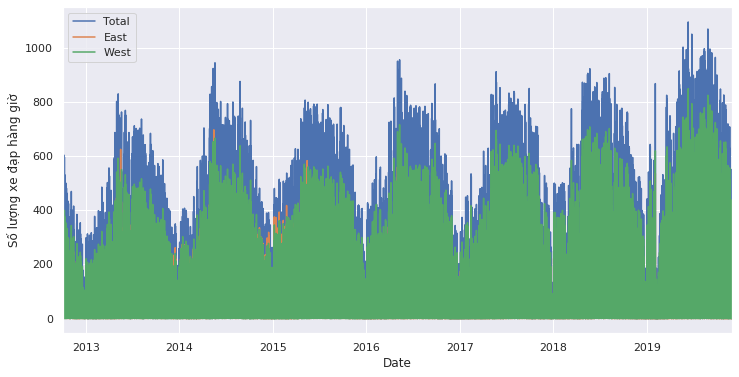

In [0]:
#Dựng đồ thị tương ứng với tập dữ liệu ban đầu
data.plot()
plt.ylabel('Số lượng xe đạp hàng giờ');

### 2.1) Phát hiện 1: Từ biểu đồ thông kê tổng số xe đạp qua cầu theo năm ta thấy:
---
* Số lượng người đi xe đạp qua cầu Fremont có xu hướng tăng lên theo từng năm
* Lượt xe đạp qua lối đi phía tây nhiều hơn lối đi phía đông.

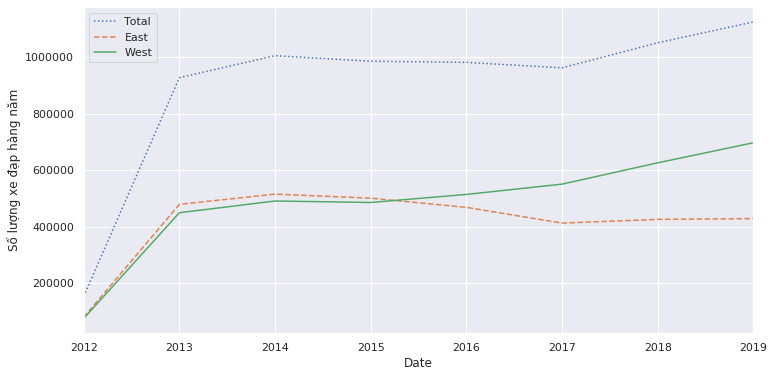

In [0]:
#Vẽ biểu đồ lượng xe theo năm
yearly = data.resample('Y').sum() #Tính tổng theo năm
yearly.plot(style=[':', '--', '-'])
plt.ylabel('Số lượng xe đạp hàng năm');

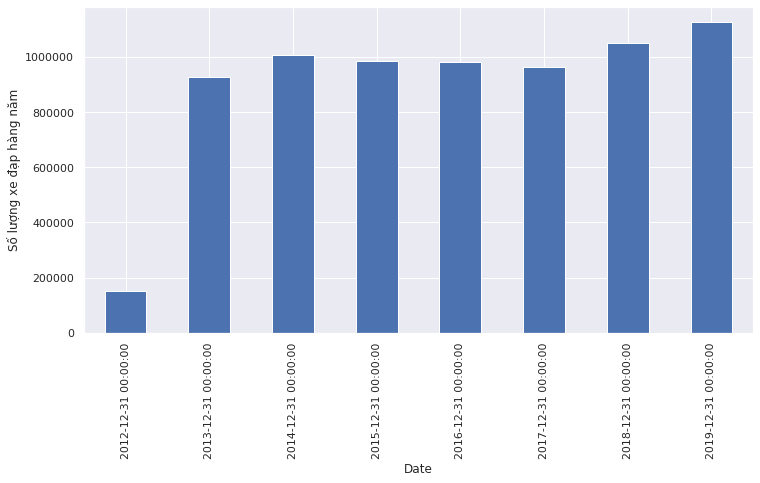

In [0]:
yearly['Total'].plot.bar()

plt.ylabel('Số lượng xe đạp hàng năm');

### 2) Phát hiện 2: Từ biểu đồ thể hiện lượng xe đạp qua cầu theo tháng ta thấy:
---
* Dữ liệu chuỗi thời gian có tính thời vụ (seasonal)
* Mọi người đạp xe nhiều hơn vào các tháng mùa hè và ít hơn vào các tháng mùa đông (4 tháng có số lượng người đạp xe nhiều nhất:5, 6, 7 và 8)

--> **Dữ liệu chuỗi thời gian về lượng xe đạp qua cầu có tính xu hướng (tăng dần) và tính thời vụ (số lượng nhiều hơn vào các tháng mùa hè và ít hơn vào các tháng mùa đông)**

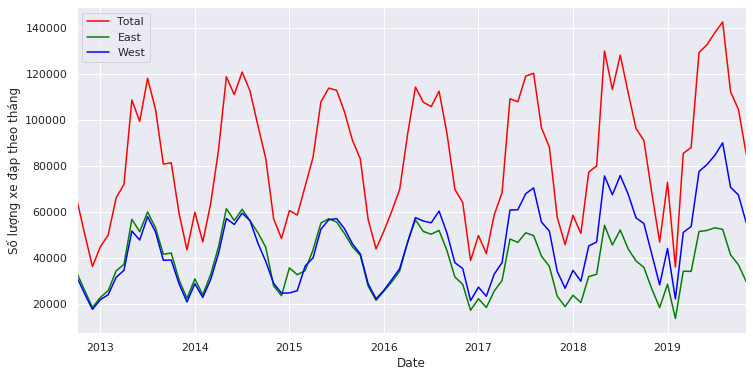

In [0]:
#Vẽ biểu đồ lượng xe theo tháng
monthly = data.resample('M').sum() #Tính tổng theo tháng
monthly.plot(style=['-', '-', '-'], color=['red','green','blue'])
plt.ylabel('Số lượng xe đạp theo tháng');

plt.show()

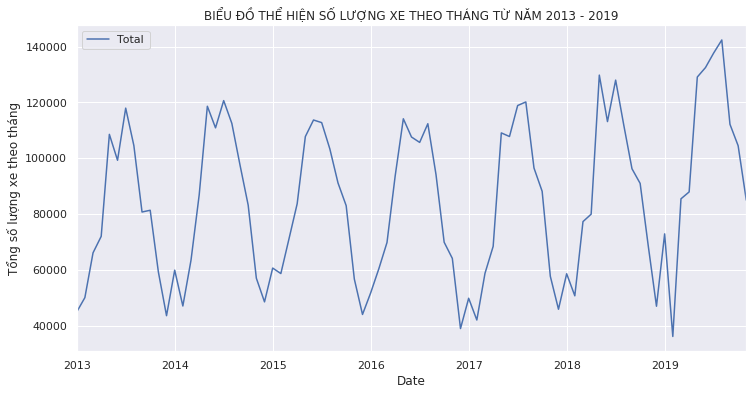

In [0]:
#lấy dữ liệu một năm 2019 hiển thị theo tháng
data_13_19 = data.loc['2013':'2019',['Total']]
monthly = data_13_19.resample('M').sum() #Tính tổng theo tháng
monthly.plot()
plt.ylabel('Tổng số lượng xe theo tháng')
plt.title('BIỂU ĐỒ THỂ HIỆN TỔNG SỐ LƯỢNG XE THEO THÁNG TỪ NĂM 2013 - 2019',loc = 'center')
plt.show()

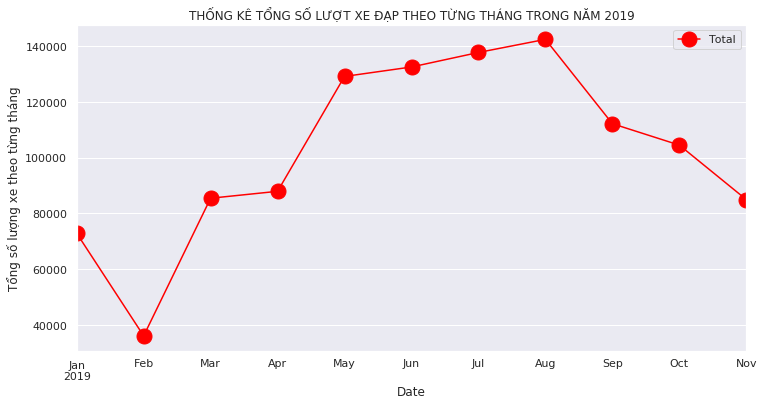

In [0]:
data_2019 = data.loc['2019',['Total']]
monthly = data_2019.resample('M').sum() #Tính tổng theo tháng
monthly.plot(marker='o', markersize='15', color='red')
plt.ylabel('Tổng số lượng xe theo từng tháng')
plt.title('THỐNG KÊ TỔNG SỐ LƯỢT XE ĐẠP THEO TỪNG THÁNG TRONG NĂM 2019',loc='center')
plt.show()

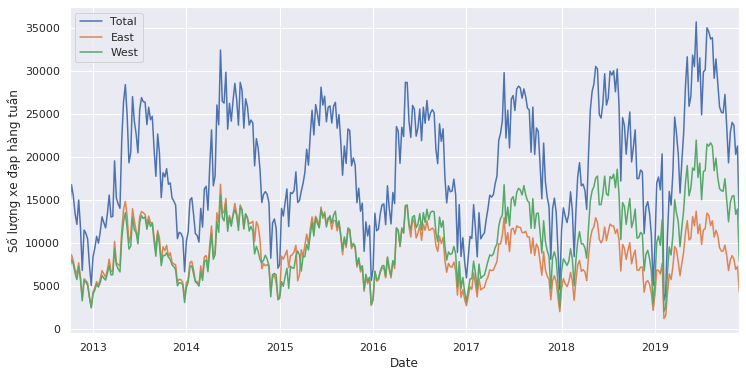

In [0]:
#Vẽ biểu đồ lượng xe theo tuần
weekly = data.resample('W').sum() #Tính tổng theo tuần
weekly.plot(style=['-', '-', '-'])
plt.ylabel('Số lượng xe đạp hàng tuần');

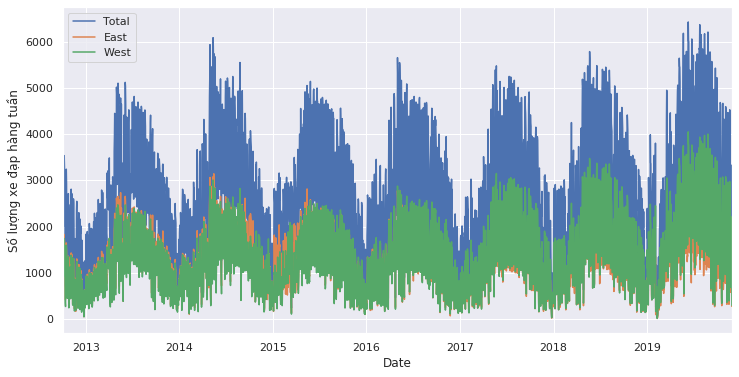

In [0]:
#Vẽ biểu đồ lượng xe theo ngày
dayly = data.resample('D').sum() #Tính tổng theo ngày
dayly.plot(style=['-', '-', '-'])
plt.ylabel('Số lượng xe đạp hàng tuần');

This shows us some interesting seasonal trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week (likely dependent on weather; see In Depth: Linear Regression where we explore this further).

Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the pd.rolling_mean() function. Here we'll do a 30 day rolling mean of our data, making sure to center the window:

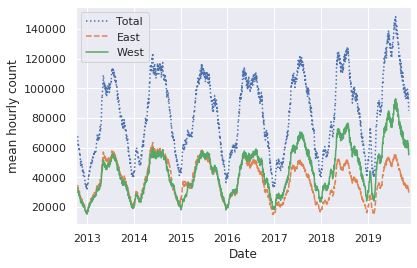

In [0]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

The jaggedness of the result is due to the hard cutoff of the window. We can get a smoother version of a rolling mean using a window function–for example, a Gaussian window. The following code specifies both the width of the window (we chose 50 days) and the width of the Gaussian within the window (we chose 10 days):

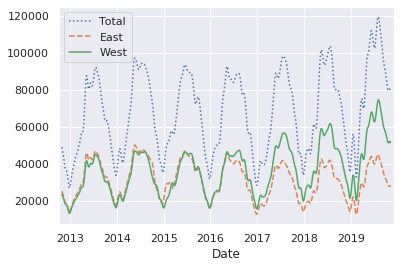

In [0]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

## Phát hiện 3: Sử dụng biểu đồ thống kê số lượng xe theo giờ
---

While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure. For example, we might want to look at the average traffic as a function of the time of day. We can do this using the GroupBy functionality discussed in Aggregation and Grouping:

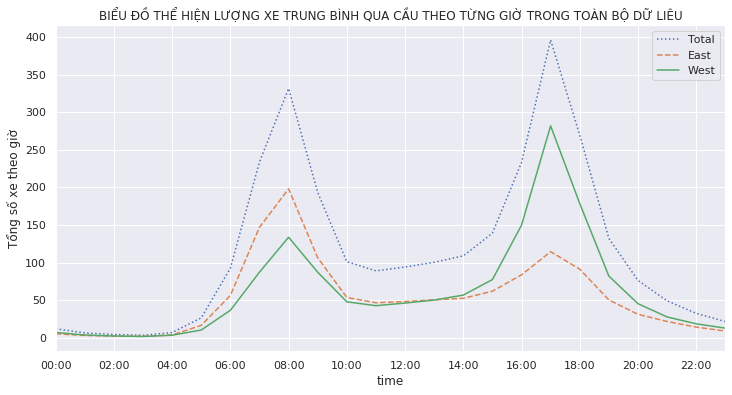

In [0]:
#Tính trung bình lượng xe theo từng giờ qua cầu
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 2 * 60 * 60 * np.arange(12)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])
plt.ylabel('Tổng số xe theo giờ')
plt.title('BIỂU ĐỒ THỂ HIỆN LƯỢNG XE TRUNG BÌNH QUA CẦU THEO TỪNG GIỜ TRONG TOÀN BỘ DỮ LIỆU',loc='center')
plt.show()

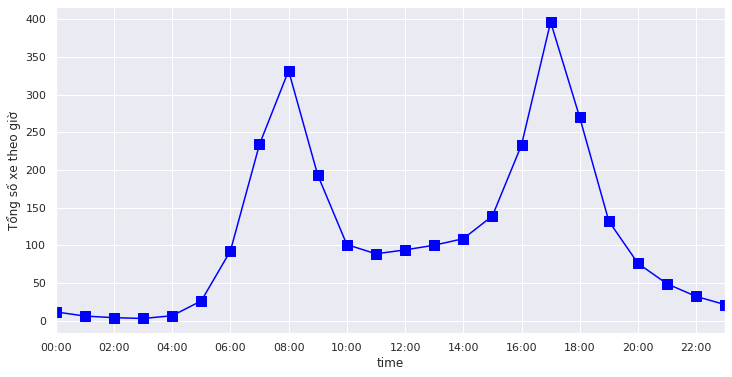

In [0]:
by_time['Total'].plot(xticks=hourly_ticks, style='-',marker='s', markersize='10', color='blue')
plt.ylabel('Tổng số xe theo giờ')
plt.show()

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening. This is likely evidence of a strong component of commuter traffic crossing the bridge. This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

We also might be curious about how things change based on the day of the week. Again, we can do this with a simple groupby:

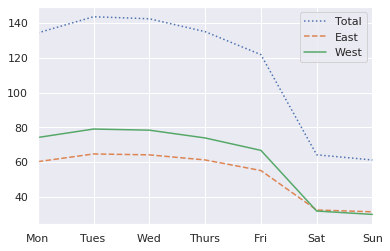

In [0]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

With this in mind, let's do a compound GroupBy and look at the hourly trend on weekdays versus weekends. We'll start by grouping by both a flag marking the weekend, and the time of day:

In [0]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

Now we'll use some of the Matplotlib tools described in Multiple Subplots to plot two panels side by side:

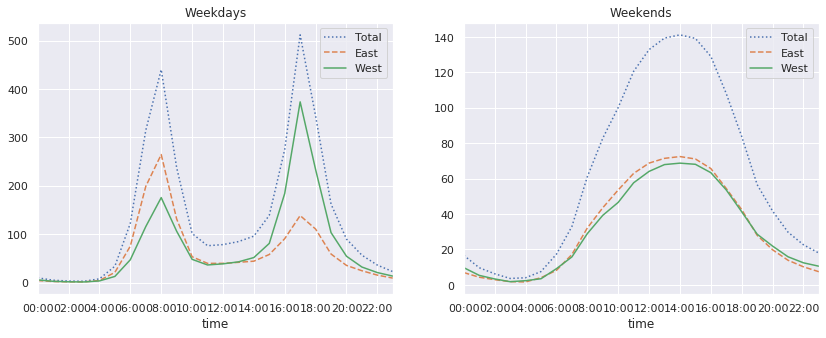

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);

The result is very interesting: we see a bimodal commute pattern during the work week, and a unimodal recreational pattern during the weekends. It would be interesting to dig through this data in more detail, and examine the effect of weather, temperature, time of year, and other factors on people's commuting patterns; for further discussion, see my blog post "Is Seattle Really Seeing an Uptick In Cycling?", which uses a subset of this data. We will also revisit this dataset in the context of modeling in In Depth: Linear Regression.